In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [214]:

url = "https://drive.google.com/uc?export=download&id=1ZSxRMGn8aFM9j3D5Sf-4sVwSd6UpRcCL"
df = pd.read_csv(url)
df=pd.DataFrame(df)
df

,Fiscal Year,Revenue (₹ cr),EBIT (₹ cr),Net Income (₹ cr),Depreciation & Amortization (₹ cr),CapEx (₹ cr),Change in Net Working Capital (₹ cr),Net Debt (₹ cr)
0,FY21,121641,30411,22152,3269,3307,768,0
1,FY22,132443,35131,24095,4225,2445,-1424,0
2,FY23,146767,31747,26233,4555,1998,-6344,0
3,FY24,153670,34424,26713,5180,2579,-5082,0
4,FY25,162990,37608,30276,3983,1946,-295,0


In [215]:
g=2
years=5
ebit_margin=22.2
tax_rate=26.5
WACC=8

In [216]:
##growth rate-cagr
## for short term use 10 to 14 percent
## for long therm use 2 to4 %
## can also take the cagr from the dataset



In [217]:
#ASSUMPTIONS:
#Growth Rate (FY26–FY30) is 14% per year
#EBIT Margin	is 22.2%
#Tax Rate	is 26.5%
##D&A as % of Revenue is	3%
#CapEx as % of Revenue is 1.7%
#Change in NWC as % of Revenue IS 3%

In [218]:
## Revenue_t​=Revenue_t−1×(1+Growth Rate)
##i have taken growth rate to be 7.6%
revenue=[]
years=5
rev_prev=df["Revenue (₹ cr)"][4]
print(rev_prev)
i=0
for i in range(years):

  rev_new = rev_prev * (1 + g/100)
  revenue.append(rev_new)
  rev_prev = rev_new

revenue=pd.Series(revenue)
revenue

162990


,0
0,166249.800000
1,169574.796000
2,172966.291920
3,176425.617758
4,179954.130114


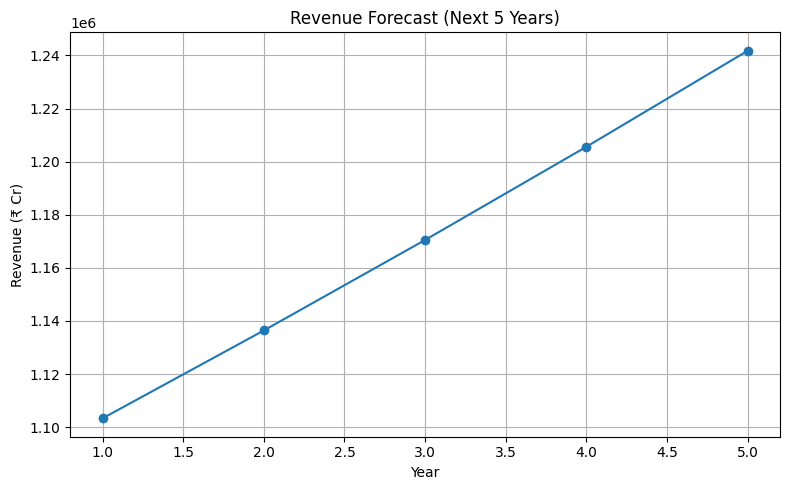

In [239]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, years + 1), revenue, marker='o')
plt.title("Revenue Forecast (Next 5 Years)")
plt.xlabel("Year")
plt.ylabel("Revenue (₹ Cr)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [219]:
#EBIT FORECAST
#EBIT= Revenue*EBIT_margin

In [220]:
#EBIT=Revenue×Ebit_Margin%
#NOPAT=EBIT×(1-tax_rate%)
#D&A=Revenue×27.4%
#CapEx=Revenue×1.7%
#ΔNWC=Revenue×3%
#FCF=NOPAT+D&A-CapEx-ΔNWC

In [221]:
#EBIT:

EBIT=revenue*(ebit_margin/100)
EBIT=pd.Series(EBIT)
EBIT

,0
0,36907.455600
1,37645.604712
2,38398.516806
3,39166.487142
4,39949.816885


In [222]:
#NOPAT=EBIT*(1-tax_rate/100)

NOPAT=EBIT*(1-tax_rate/100)
NOPAT

,0
0,27126.979866
1,27669.519463
2,28222.909853
3,28787.368050
4,29363.115411


In [223]:
#D&A=Revenue*(3/100)
DnA=revenue*3/100
DnA

,0
0,4987.494000
1,5087.243880
2,5188.988758
3,5292.768533
4,5398.623903


In [224]:
#CapEx=Revenue*17/100
CapEx=revenue*1.7/100
CapEx

,0
0,2826.246600
1,2882.771532
2,2940.426963
3,2999.235502
4,3059.220212


In [225]:
#ΔNWC=Revenue*1/100
change_NWC=revenue*3/100
change_NWC

,0
0,4987.494000
1,5087.243880
2,5188.988758
3,5292.768533
4,5398.623903


In [226]:
#FCF=NOPAT+D&A-CapEx-ΔNWC
FCF=NOPAT+DnA-change_NWC-CapEx
FCF

,0
0,24300.733266
1,24786.747931
2,25282.482890
3,25788.132548
4,26303.895199


In [227]:
# now,i will discount these fcfs using WACC(Weighted average cost of capital)(i will take it as 11.51 % as it is what i got from google)
# now ill calculate terminal value, enterprise value then adjust them for net debt  and get intrinsic value per share

In [228]:
# discounted fcf_t=fcf_t*discount_factor where discount_factor=(1/(1+wacc))^t

disc_FCF=[]
for i in range(years):
  disc_FCF.append(FCF[i]/(1+WACC/100)**(i+1))

disc_FCF=pd.Series(disc_FCF)
disc_FCF

,0
0,22500.678950
1,21250.641231
2,20070.050051
3,18955.047270
4,17901.989089


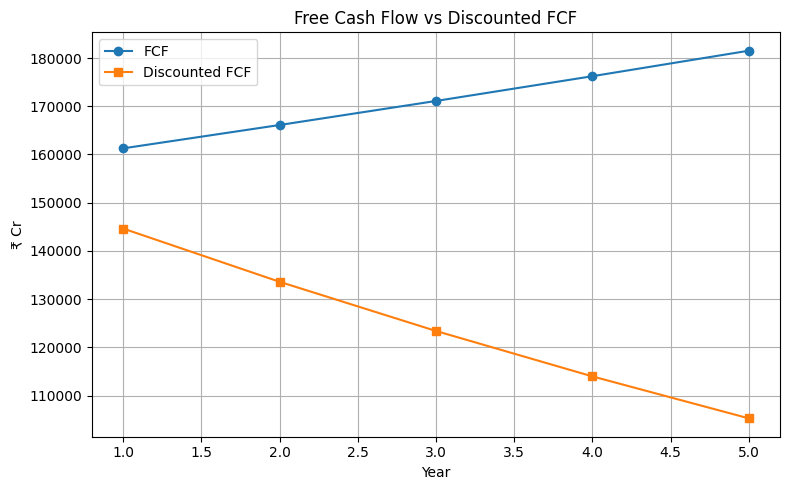

In [240]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, years + 1), FCF, label='FCF', marker='o')
plt.plot(range(1, years + 1), disc_FCF, label='Discounted FCF', marker='s')
plt.title("Free Cash Flow vs Discounted FCF")
plt.xlabel("Year")
plt.ylabel("₹ Cr")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [229]:
data_pred=pd.DataFrame(
    {"revenue":revenue,
     "EBIT":EBIT,
     "NOPAT":NOPAT,
     "D&A":DnA,
     "CapEx":CapEx,
     "ΔNWC":change_NWC,
     "FCF":FCF,
     "disc_FCF":disc_FCF
     }
    )
data_pred

,revenue,EBIT,NOPAT,D&A,CapEx,ΔNWC,FCF,disc_FCF
0,166249.800000,36907.455600,27126.979866,4987.494000,2826.246600,4987.494000,24300.733266,22500.678950
1,169574.796000,37645.604712,27669.519463,5087.243880,2882.771532,5087.243880,24786.747931,21250.641231
2,172966.291920,38398.516806,28222.909853,5188.988758,2940.426963,5188.988758,25282.482890,20070.050051
3,176425.617758,39166.487142,28787.368050,5292.768533,2999.235502,5292.768533,25788.132548,18955.047270
4,179954.130114,39949.816885,29363.115411,5398.623903,3059.220212,5398.623903,26303.895199,17901.989089


In [230]:
# Terminal_val=FCF_end*(1+g)/(WACC-G)
terminal_val=FCF[years-1]*(1+g/100)/(WACC/100-g/100)
discounted_terminal_val=terminal_val*(1/(1+WACC/100)**years)
discounted_terminal_val

np.float64(304333.8145091273)

In [231]:
#Enterprise value is the sum of all discounted cash flows and the discounted terminal value
sum=0.0
for _ in range(years):
  sum+=disc_FCF[_]
enterprise_val=sum+discounted_terminal_val
enterprise_val

np.float64(405012.22109999997)

In [232]:
# to get the equity value,subtract the debt from enterprise value
net_debt=0
equity_val=enterprise_val-net_debt
equity_val

np.float64(405012.22109999997)

In [233]:
#now to find intrinsic value of the shares , divide total equity by the total number of outstanding shares
outstanding_shares=4231578947
intrinsic_val=equity_val*1e7/outstanding_shares
intrinsic_val

np.float64(957.1184330310923)

In [234]:
#If DCF Intrinsic Value>Market Price→The stock is undervalued

#If DCF Intrinsic Value<Market Price→The stock is overvalued